In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

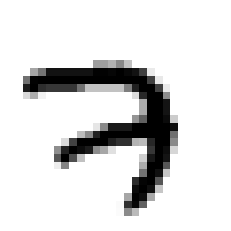

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

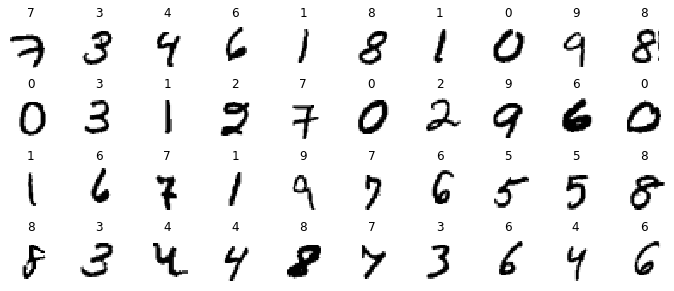

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Metal device set to: Apple M1


2022-05-24 15:38:29.620646: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-24 15:38:29.620741: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

2022-05-24 15:38:40.108336: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-24 15:38:40.209705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
1716/1719 [============================>.] - ETA: 0s - loss: 0.5964 - accuracy: 0.8481

2022-05-24 15:38:54.835019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 16s 8ms/step - loss: 0.5957 - accuracy: 0.8482 - val_loss: 0.3045 - val_accuracy: 0.9152
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2894 - accuracy: 0.9171 - val_loss: 0.2409 - val_accuracy: 0.9318
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2386 - accuracy: 0.9324 - val_loss: 0.2020 - val_accuracy: 0.9430
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2044 - accuracy: 0.9414 - val_loss: 0.1813 - val_accuracy: 0.9492
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1796 - accuracy: 0.9490 - val_loss: 0.1607 - val_accuracy: 0.9554
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1599 - accuracy: 0.9548 - val_loss: 0.1466 - val_accuracy: 0.9616
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1438 - accuracy: 0.9599 - val_loss: 0.1348 - val_accuracy: 0.9

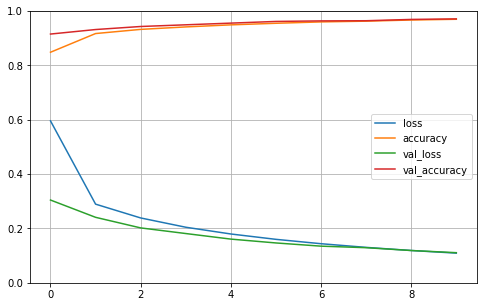

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1144 - accuracy: 0.9647


[0.11443734914064407, 0.9647000432014465]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

2022-05-24 15:40:47.486263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ]],
      dtype=float32)

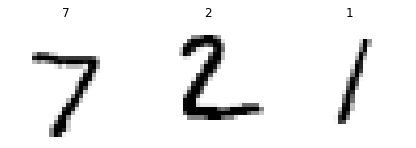

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.

Porównaj powyższy wynik  z różnymi funkcjami aktywacji:
* relu
* elu
* LeakyReLU

Activation function:  relu 


Epoch 1/10
  17/1719 [..............................] - ETA: 10s - loss: 2.2718 - accuracy: 0.1103

2022-05-24 15:40:48.006831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1718/1719 [============================>.] - ETA: 0s - loss: 0.6107 - accuracy: 0.8415

2022-05-24 15:40:58.940183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 12s 7ms/step - loss: 0.6105 - accuracy: 0.8416 - val_loss: 0.3030 - val_accuracy: 0.9184
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2869 - accuracy: 0.9191 - val_loss: 0.2373 - val_accuracy: 0.9326
Epoch 3/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2348 - accuracy: 0.9331 - val_loss: 0.1979 - val_accuracy: 0.9452
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2008 - accuracy: 0.9435 - val_loss: 0.1757 - val_accuracy: 0.9512
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1758 - accuracy: 0.9498 - val_loss: 0.1562 - val_accuracy: 0.9554
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1562 - accuracy: 0.9556 - val_loss: 0.1434 - val_accuracy: 0.9616
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.1401 - accuracy: 0.9607 - val_loss: 0.1317 - val_accuracy: 0.9

2022-05-24 15:42:56.681221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.9613


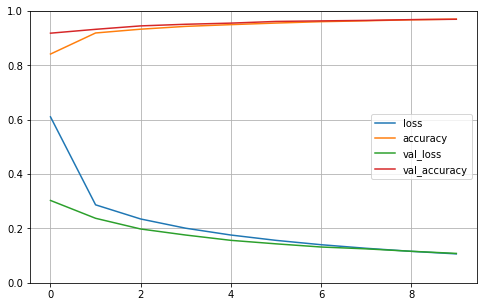

Activation function:  elu 


Epoch 1/10
  16/1719 [..............................] - ETA: 12s - loss: 2.3018 - accuracy: 0.1523

2022-05-24 15:42:57.548523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1718/1719 [============================>.] - ETA: 0s - loss: 0.6176 - accuracy: 0.8365

2022-05-24 15:43:10.027173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 8ms/step - loss: 0.6174 - accuracy: 0.8365 - val_loss: 0.3053 - val_accuracy: 0.9164
Epoch 2/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2862 - accuracy: 0.9180 - val_loss: 0.2404 - val_accuracy: 0.9320
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.2331 - accuracy: 0.9334 - val_loss: 0.2009 - val_accuracy: 0.9428
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1988 - accuracy: 0.9427 - val_loss: 0.1774 - val_accuracy: 0.9508
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1737 - accuracy: 0.9507 - val_loss: 0.1583 - val_accuracy: 0.9556
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1538 - accuracy: 0.9563 - val_loss: 0.1472 - val_accuracy: 0.9602
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1375 - accuracy: 0.9618 - val_loss: 0.1343 - val_accuracy: 0.9

2022-05-24 15:45:04.407847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.9609


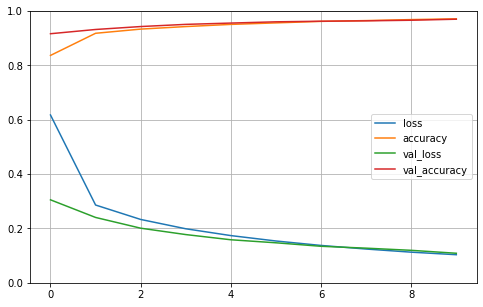

Activation function:  LeakyReLU 


Epoch 1/10
  17/1719 [..............................] - ETA: 11s - loss: 2.3000 - accuracy: 0.1360

2022-05-24 15:45:05.346671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1715/1719 [============================>.] - ETA: 0s - loss: 0.6091 - accuracy: 0.8423

2022-05-24 15:45:16.512492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 12s 7ms/step - loss: 0.6083 - accuracy: 0.8425 - val_loss: 0.3072 - val_accuracy: 0.9188
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.2895 - accuracy: 0.9173 - val_loss: 0.2428 - val_accuracy: 0.9310
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2386 - accuracy: 0.9318 - val_loss: 0.2040 - val_accuracy: 0.9416
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2052 - accuracy: 0.9411 - val_loss: 0.1818 - val_accuracy: 0.9492
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1802 - accuracy: 0.9485 - val_loss: 0.1621 - val_accuracy: 0.9546
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1606 - accuracy: 0.9543 - val_loss: 0.1488 - val_accuracy: 0.9598
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.1445 - accuracy: 0.9593 - val_loss: 0.1362 - val_accuracy: 0.9

2022-05-24 15:47:02.900432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.9595


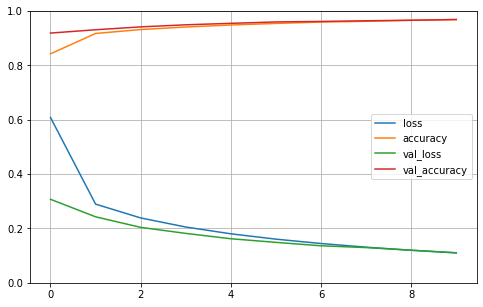

In [16]:
import pandas as pd
from sklearn import  metrics

act_fun = ["relu", "elu","LeakyReLU"]

dfs = []

for activation in act_fun:
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

    print("Activation function: ",activation,'\n\n')

    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

    print(metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") ))

    dfs.append(pd.DataFrame(history.history))
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

# Zad. 
Stwórz wykres porównujący metody. 

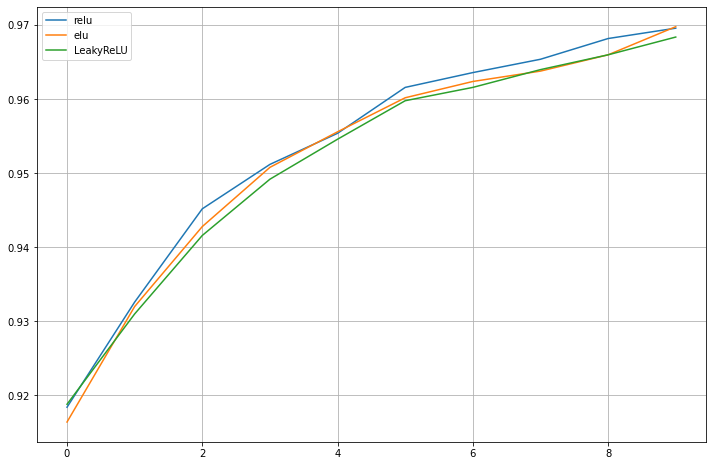

In [18]:
plt.figure(figsize=(12, 8))
dfs.append(pd.DataFrame(history.history))

for df,fun in zip(dfs,act_fun):
    df['val_accuracy'].plot(label = fun)
    plt.grid(True)

plt.legend()
plt.show()